In [1]:
import numpy as np
from skimage import io, color, img_as_float
# img_as_float переводит изображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a

import matplotlib.pyplot as plt

from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
import cv2

In [2]:
# Function to normalize an image
# в результате работы функции все значения ячейки матрицы распологаются от 0 до 1
# функция работает изображением, которое оно тоже воспринимает как матрицу

def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res


# Function to normalize columns

# функция norm_columns в коде ниже не используется
# тут функция от функции, а потом делим каждый элемент на сумму элементов в строке

# Поэлементное деление и растягивание описаны в тетрадке 
# https://github.com/Chernobilsky/Mishka-project/blob/main/GPT_talks/adding_dimensions_and_broadcasting.ipynb 

def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
# в отличии от norm_columns, чтобы сделать поэлементное деление, нужна индексация
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c for further explanation

[Обсуждение поэлементных операций, отсюда понятно разнице между синтаксисом norm_columns и norm_rows](https://github.com/Chernobilsky/Mishka-project/blob/main/GPT_talks/adding_dimensions_and_broadcasting.ipynb)

In [3]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
# io.imread загружает изображение из файла и превращает его в массив
# про io.imread https://chat.openai.com/share/54ff94bb-3039-477d-8137-6e73ee41ef90 

print(mandrill[:2, :5, :5])
mandrill.shape
# в результате получаем трехмерный массив 512x512x3

[[[164 150  71]
  [ 63  57  31]
  [ 75  43  10]
  [ 95  94  46]
  [157 140  73]]

 [[120 125  62]
  [135  97  33]
  [ 55  35  23]
  [ 75  72  24]
  [116  86  46]]]


(512, 512, 3)

In [4]:
mandrill_float = img_as_float(mandrill)
# mandrill_float это матрица, где ячейки - это десятичные дроби от 0,00 до 1,00
# в отличие от стандартного целочисленного формата ячеек в файле mandrill, 
# в котором представлены писели после операции io.imread
# то есть матрица сохраняет размер, но ее ячейки преобразуются в float в диапазоне

print(mandrill_float[:2, :5, :5])
mandrill_float.shape

[[[0.64313725 0.58823529 0.27843137]
  [0.24705882 0.22352941 0.12156863]
  [0.29411765 0.16862745 0.03921569]
  [0.37254902 0.36862745 0.18039216]
  [0.61568627 0.54901961 0.28627451]]

 [[0.47058824 0.49019608 0.24313725]
  [0.52941176 0.38039216 0.12941176]
  [0.21568627 0.1372549  0.09019608]
  [0.29411765 0.28235294 0.09411765]
  [0.45490196 0.3372549  0.18039216]]]


(512, 512, 3)

In [5]:
print('тип ячеек в матрице mandrill - ', mandrill.dtype)
print('тип ячеек в матрице mandrill_float - ', mandrill_float.dtype)

тип ячеек в матрице mandrill -  uint8
тип ячеек в матрице mandrill_float -  float64


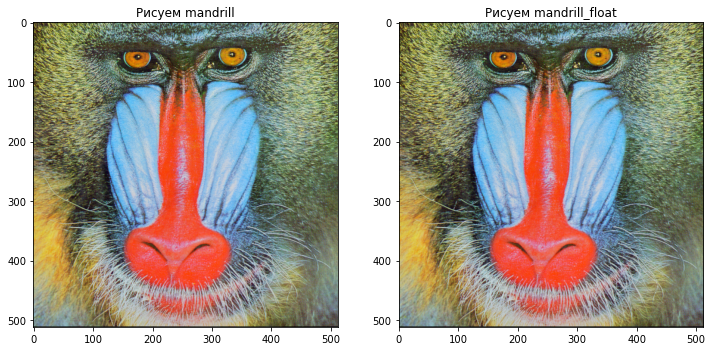

In [6]:
# с помощью команды imshow библиотеки matplotlib наши изображения 
# показываются одинаковым образом
# эквивалетным исходному 
# потому что imshow сама производит нормализацию графиков
# ChatGPT https://chat.openai.com/share/0d955b4e-c88b-4b33-a7c6-5b32323d86eb
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(mandrill)
ax1.set_title("Рисуем mandrill")
ax2.imshow(mandrill_float)
ax2.set_title("Рисуем mandrill_float")
plt.show()

In [7]:
mandrill_unit8 = (mandrill * 255).astype(np.uint8)
print(mandrill_unit8[:2, :5, :5])
print()
print('Максимальный элемент массива mandril равен', np.max(mandrill))
print('Максимальный элемент массива mandrill_unit8 равен', np.max(mandrill_unit8))

[[[ 92 106 185]
  [193 199 225]
  [181 213 246]
  [161 162 210]
  [ 99 116 183]]

 [[136 131 194]
  [121 159 223]
  [201 221 233]
  [181 184 232]
  [140 170 210]]]

Максимальный элемент массива mandril равен 255
Максимальный элемент массива mandrill_unit8 равен 255


In [8]:
print('Минимальный элемент массива mandrill равен', np.min(mandrill))
print('Минимальный элемент массива mandrill_unit8 равен', np.min(mandrill_unit8))

Минимальный элемент массива mandrill равен 0
Минимальный элемент массива mandrill_unit8 равен 0


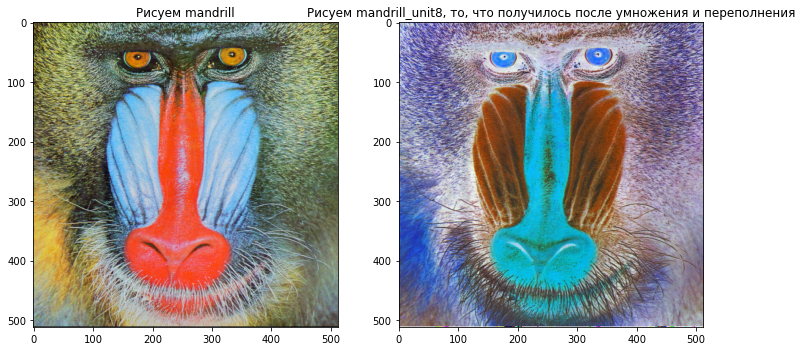

In [9]:
# в результате переполнения изображение меняет цвет, но сохраняет форму
# про переполнение в типе unit8 пишет ChatGPT https://chat.openai.com/share/62b99bff-77cd-4ee4-922a-0a248186794f
mandrill_unit8 = (mandrill * 255).astype(np.uint8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(mandrill)
ax1.set_title("Рисуем mandrill")
ax2.imshow(mandrill_unit8)
ax2.set_title("Рисуем mandrill_unit8, то, что получилось после умножения и переполнения")
plt.show()

#plt.imshow(mandrill_unit8)
#plt.show()

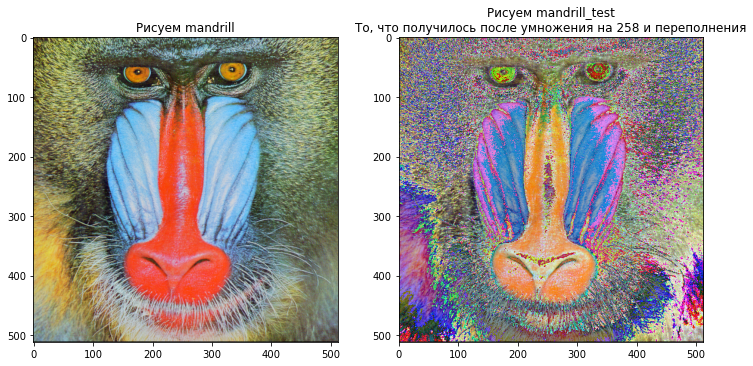

In [10]:
# тут я играю с разными k. Что-то остается от изображения, только если деление k на 255 дает нам в пределах 10
k=258
mandrill_test = (mandrill * k).astype(np.uint8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(mandrill)
ax1.set_title("Рисуем mandrill")
ax2.imshow(mandrill_test)
ax2.set_title(f"Рисуем mandrill_test\nТо, что получилось после умножения на {k} и переполнения")
plt.show()

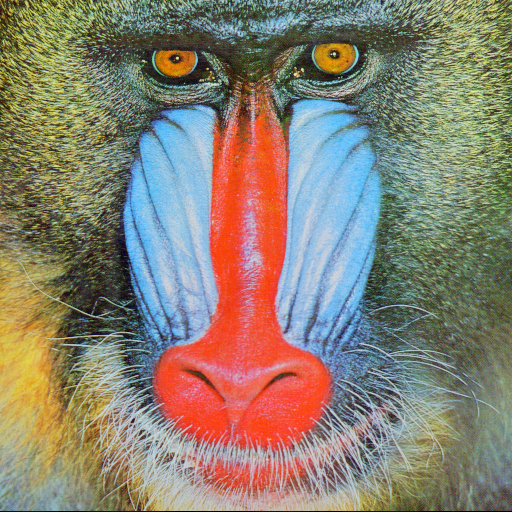

In [11]:
# io.imsave преобразует нашу матрицу с типом ячеек unit8 обратно в файл изображения
io.imsave("mandrill_original.png", mandrill)

# display(Image) показывает обычный png-файл, естественно, совпадающий с изначальным
display(Image("mandrill_original.png")) 

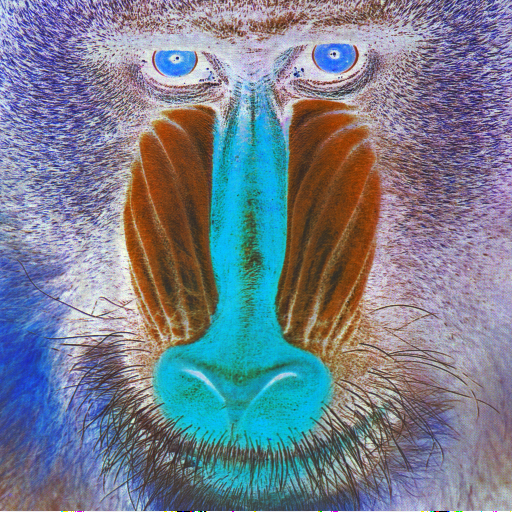

In [12]:
# mandrill_unit8 тоже нормально отображается и показывается
io.imsave("mandrill_unit8.png", mandrill_unit8)

# display(Image) показывает обычный png-файл, естественно, совпадающий с изначальным
display(Image("mandrill_unit8.png")) 

**Дошла только до сюда, собственно, julia_monochrome пока не разбирала**

In [14]:
# because of the simplicity of our implementation, the input image must already be float
# правильно я понимаю, что julia_monochrome - это функция, которая переводит цветное изображение в монохромное?
# то есть у нас на входе матрица 512х512х3
# у которой np.max(rgb_image) = 1, np.max(rgb_image) = 0
def julia_monochrome(rgb_image):
    #???? rgb_image это трехмерный массив с определенными требованиями (см выше какими)?
    # coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard
    coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)
    return rgb_image @ coeffs

Функция `julia_monochrome` формально может работать с любым трёхмерным массивом, у которого последнее измерение имеет размер 3. Но реально используется для перевода цветного изображения в черно-белое.  

[обсуждение возможностей функции julia_monochrome с ChatGPT](https://chat.openai.com/share/2be730c2-f49f-4fa0-8197-ece29060ea48)

In [15]:
# because of the simplicity of our implementation, the input image must already be float
m = julia_monochrome(mandrill_float)

In [16]:
m.shape
# то есть при переходе в монохромный режим мы из трехмерного массива 512 х 512 х 3 получили матрицу 512 х 512

(512, 512)

In [17]:
m

array([[0.56933333, 0.21894118, 0.19139608, ..., 0.44152157, 0.60181569,
        0.69540784],
       [0.45616863, 0.39633725, 0.15534118, ..., 0.50913725, 0.58270196,
        0.49145882],
       [0.30028627, 0.44697255, 0.18082745, ..., 0.39267843, 0.34591373,
        0.31862745],
       ...,
       [0.55186275, 0.57038824, 0.55283137, ..., 0.32384706, 0.35090588,
        0.30595686],
       [0.61187843, 0.5522902 , 0.51440392, ..., 0.30936078, 0.31336471,
        0.27056863],
       [0.04123922, 0.04426667, 0.05279216, ..., 0.02651373, 0.0138549 ,
        0.01709412]])

In [18]:
print(np.max(m))
print(np.min(m))

0.9040901960784312
0.0


In [19]:
mandrill_uint8 = np.uint8(m * 255)

In [20]:
mandrill_uint8

array([[145,  55,  48, ..., 112, 153, 177],
       [116, 101,  39, ..., 129, 148, 125],
       [ 76, 113,  46, ..., 100,  88,  81],
       ...,
       [140, 145, 140, ...,  82,  89,  78],
       [156, 140, 131, ...,  78,  79,  68],
       [ 10,  11,  13, ...,   6,   3,   4]], dtype=uint8)

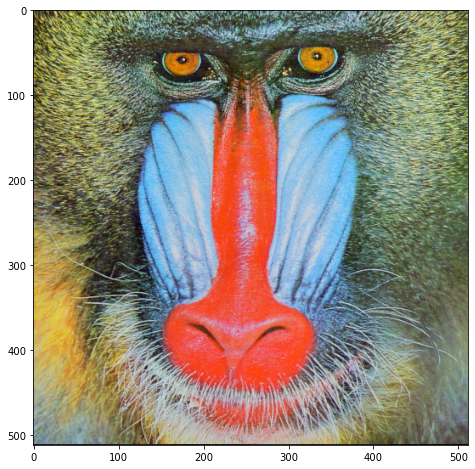

In [21]:
plt.figure(figsize = (10,8))
plt.imshow(mandrill_float, cmap = 'cividis')
plt.show()
# какую цветовую карту не используй, выглядит одинаково

In [22]:
# cv2.imwrite(test, mandrill_uint8)

In [23]:
def save_show(monochrome_image, file_name):
    monochrome_image_uint8 = (monochrome_image * 255).astype(np.uint8)
    cv2.imwrite(file_name, monochrome_image_uint8)
    display(Image(filename=file_name))

Функция `save_show` используется для перевода монохромного изображения в формате массива Numpy, где элементы это вещественные числа от 0 до 1 в массив  Numpy, где элементы массива находятся в формате unit8 (то есть беззнаковое число из 8 бит).
Ну и заодно показывает на экране подучившееся изображение.

[подробное обсуждения функции save_show с ChatGPT](https://chat.openai.com/share/e66404bd-eb53-462e-a1e6-c3bd56e06627)

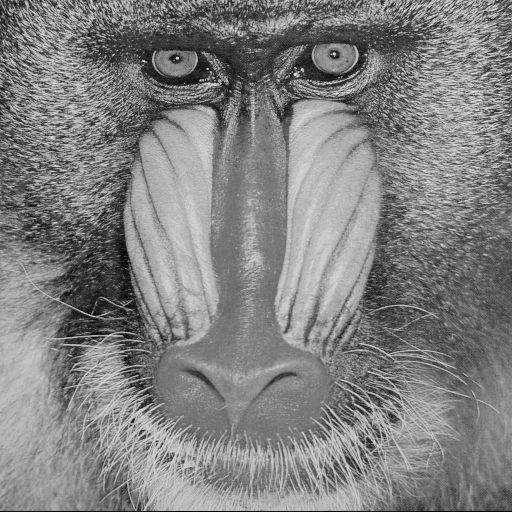

In [24]:
save_show(m, 'gray_mandrill.png')

In [25]:
t_m_m = normalize_image(np.dot(np.transpose(m), m))

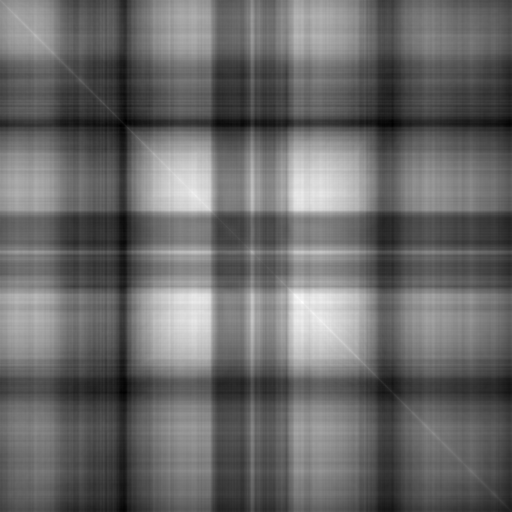

In [26]:
save_show(t_m_m, 'product_t_m_m.png')

In [27]:
# import cv2

# Load an image from file
# img = cv2.imread('path/to/image.png')
# Resize the image
# new_img = cv2.resize(img, (new_width, new_height))
# Save the image
# cv2.imwrite('path/to/save/resized_image.png', new_img)

m_new = cv2.resize(m, (512, 256))

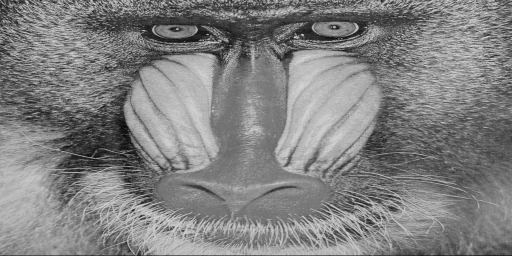

In [28]:
save_show(m_new, 'm_new.png')

In [29]:
m_other = cv2.resize(m, (256, 512))

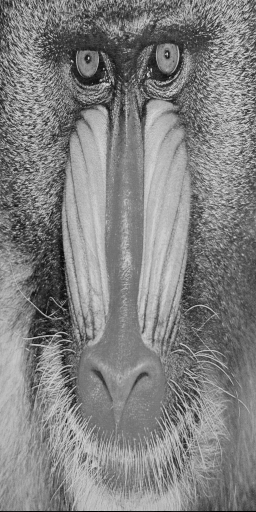

In [30]:
save_show(m_other, 'm_other.png')

In [31]:
m_new_t = np.transpose(m_new)

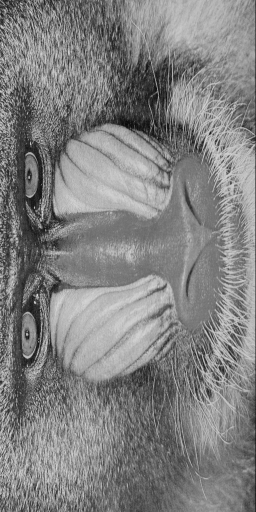

In [32]:
save_show(m_new_t, 'm_new_t.png')

In [33]:
product_1 = normalize_image(np.dot(m_new_t, m_new))

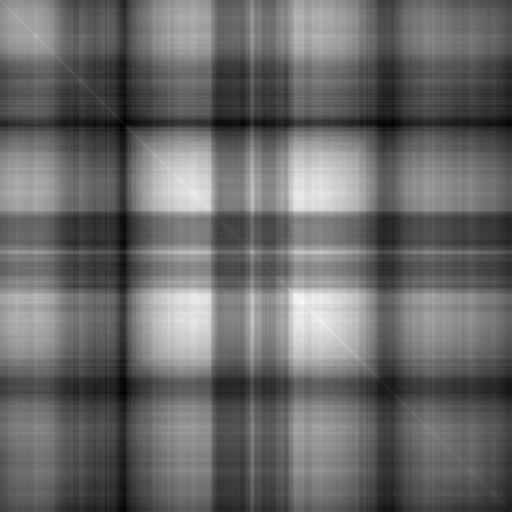

In [34]:
save_show(product_1, 'product_1.png')

In [35]:
product_2 = normalize_image(np.dot(m_new, m_new))

ValueError: shapes (256,512) and (256,512) not aligned: 512 (dim 1) != 256 (dim 0)